In [65]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

In [67]:
df=pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Preprocessing of Data**

In [70]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [73]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [74]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Exploratory Data Analysis**

<AxesSubplot:xlabel='Gender', ylabel='count'>

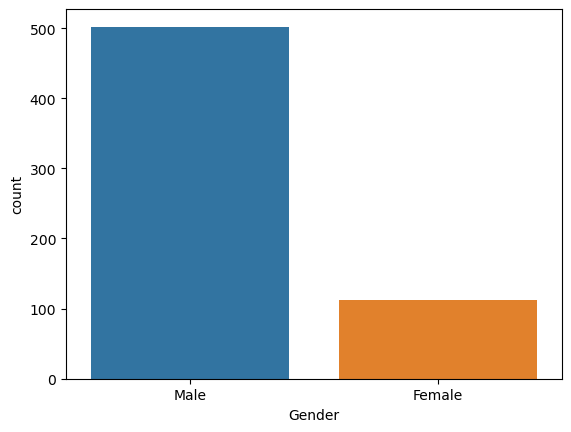

In [75]:
#Categorical Attribute Visualization 
sns.countplot(x=df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

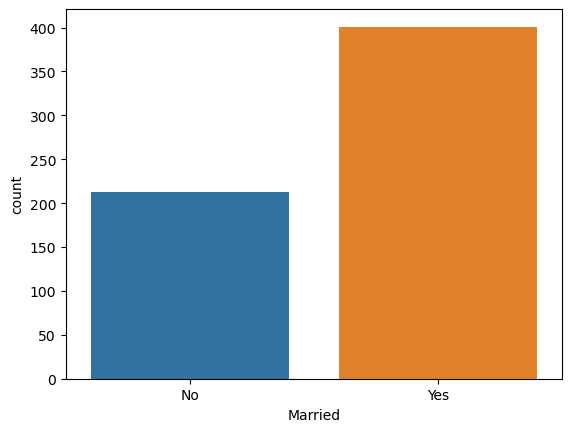

In [76]:
sns.countplot(x=df['Married'])

<AxesSubplot:xlabel='Married', ylabel='count'>

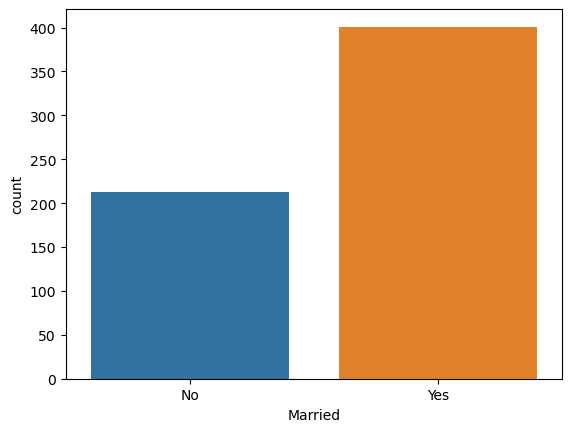

In [77]:
sns.countplot(x=df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

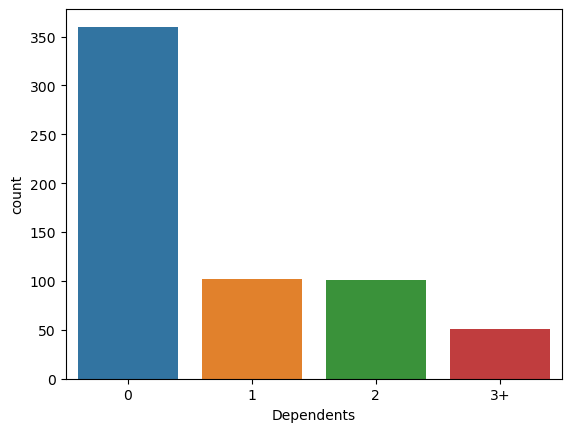

In [78]:
sns.countplot(x=df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

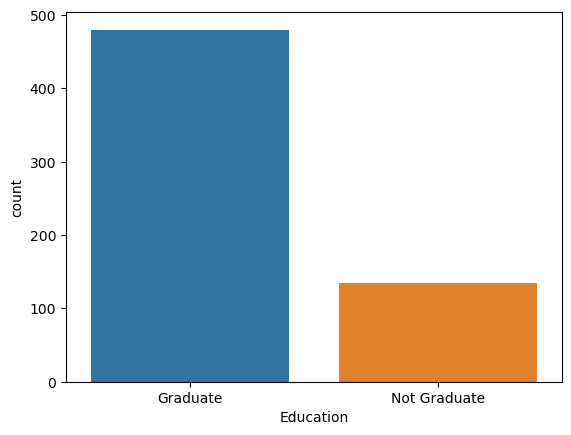

In [79]:
sns.countplot(x=df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

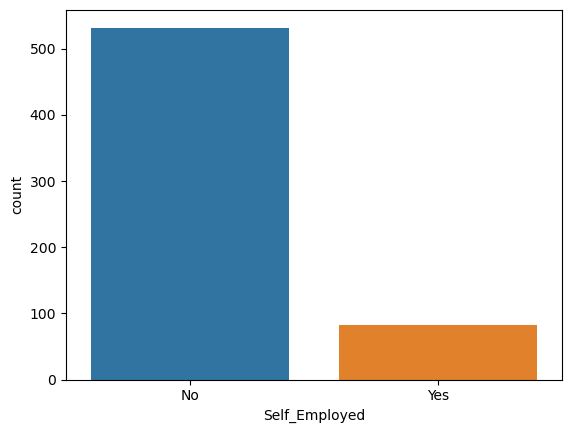

In [80]:
sns.countplot(x=df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

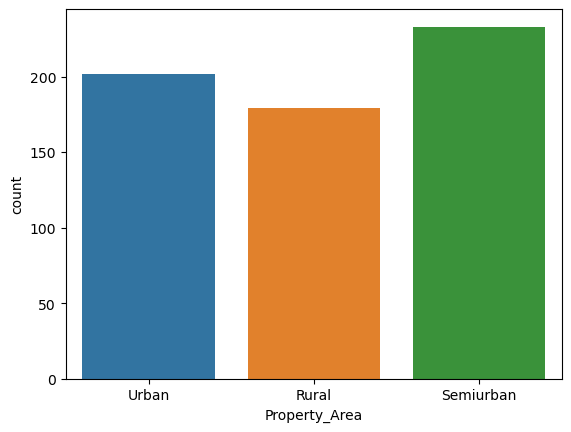

In [81]:
sns.countplot(x=df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

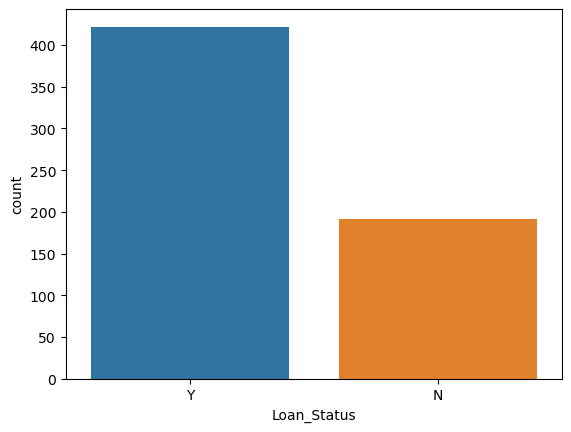

In [83]:
sns.countplot(x=df['Loan_Status'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


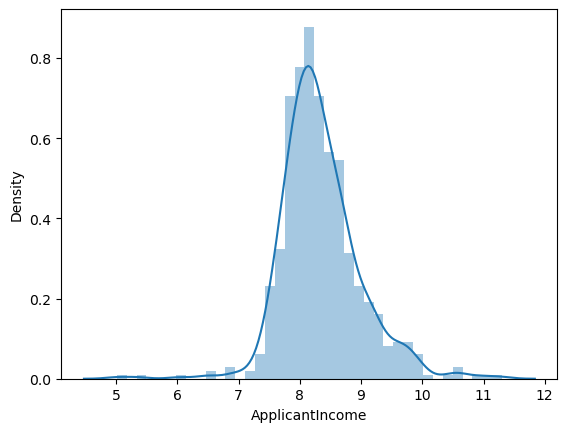

In [84]:
#numerical applicants visualization
sns.distplot(df['ApplicantIncome'])
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


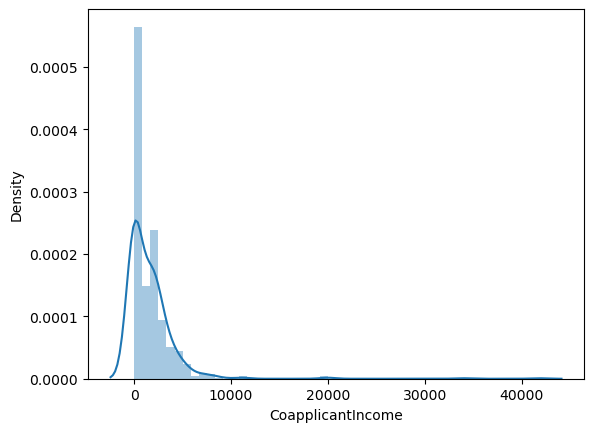

In [85]:
sns.distplot(df['CoapplicantIncome'])
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


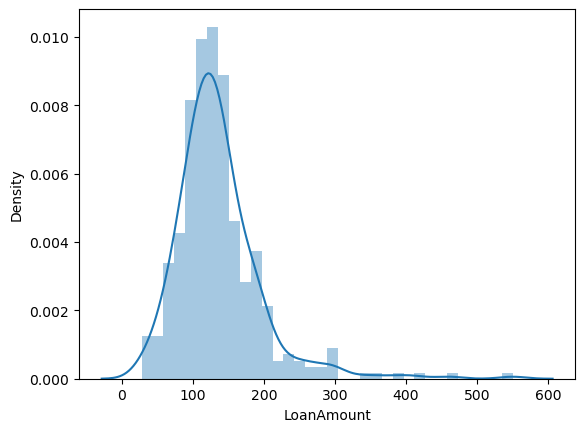

In [22]:
sns.distplot(df['LoanAmount'])
df['LoanAmount']=np.log(df['LoanAmount'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


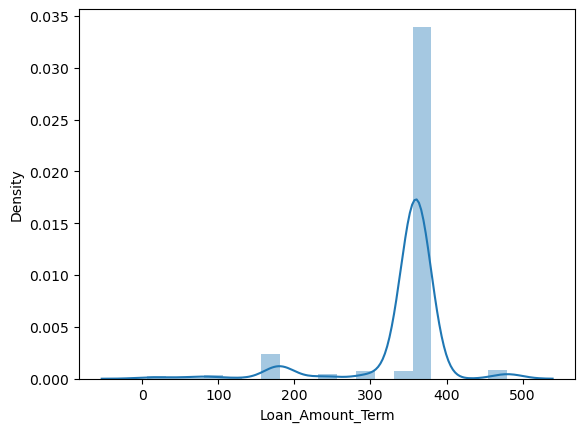

In [23]:
sns.distplot(df['Loan_Amount_Term'])
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


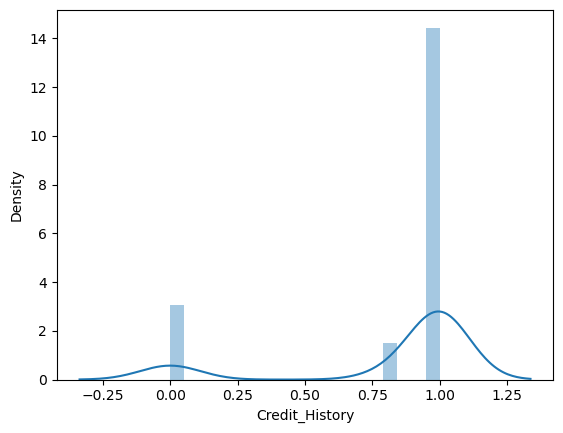

In [24]:
sns.distplot(df['Credit_History'])
df['Credit_History']=np.log(df['Credit_History'])

**#Creation of new attributes**

In [86]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,2.160333,-inf,146.412162,360.0,1.0,Urban,Y,-inf
1,LP001003,Male,Yes,1,Graduate,No,2.131810,7.318540,128.000000,360.0,1.0,Rural,N,9.450349
2,LP001005,Male,Yes,0,Graduate,Yes,2.080237,-inf,66.000000,360.0,1.0,Urban,Y,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,2.061368,7.765569,120.000000,360.0,1.0,Urban,Y,9.826937
4,LP001008,Male,No,0,Graduate,No,2.163267,-inf,141.000000,360.0,1.0,Urban,Y,-inf


**Log Transformation** 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

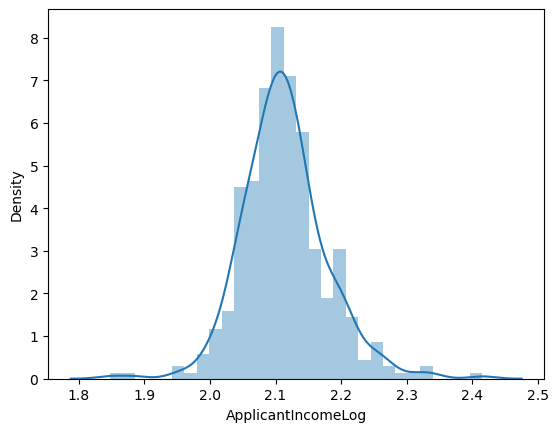

In [26]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])


/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

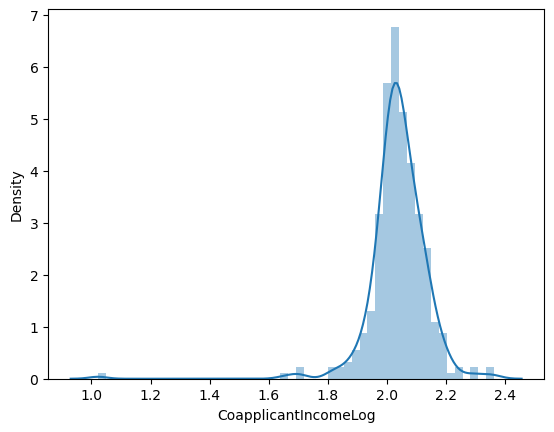

In [89]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

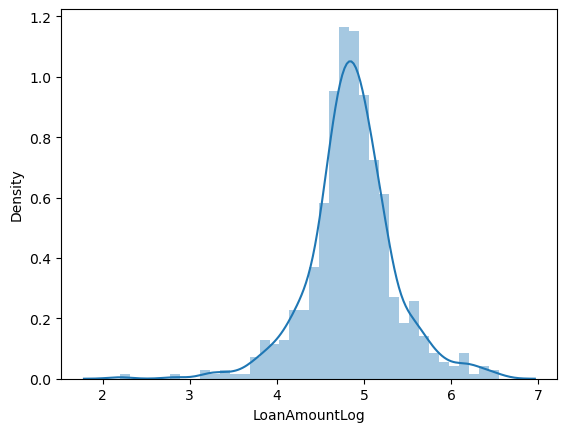

In [90]:
df['LoanAmountLog']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

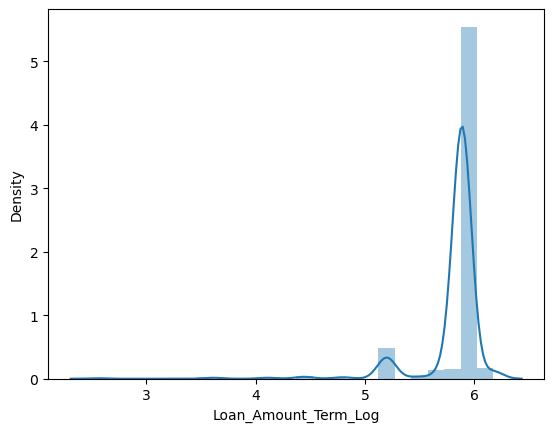

In [91]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

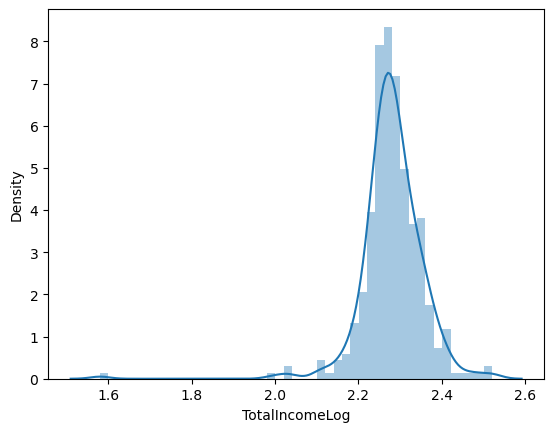

In [92]:
df['TotalIncomeLog']=np.log(df['TotalIncome'])
sns.distplot(df['TotalIncomeLog'])

**Correlation Matrix**

<AxesSubplot:>

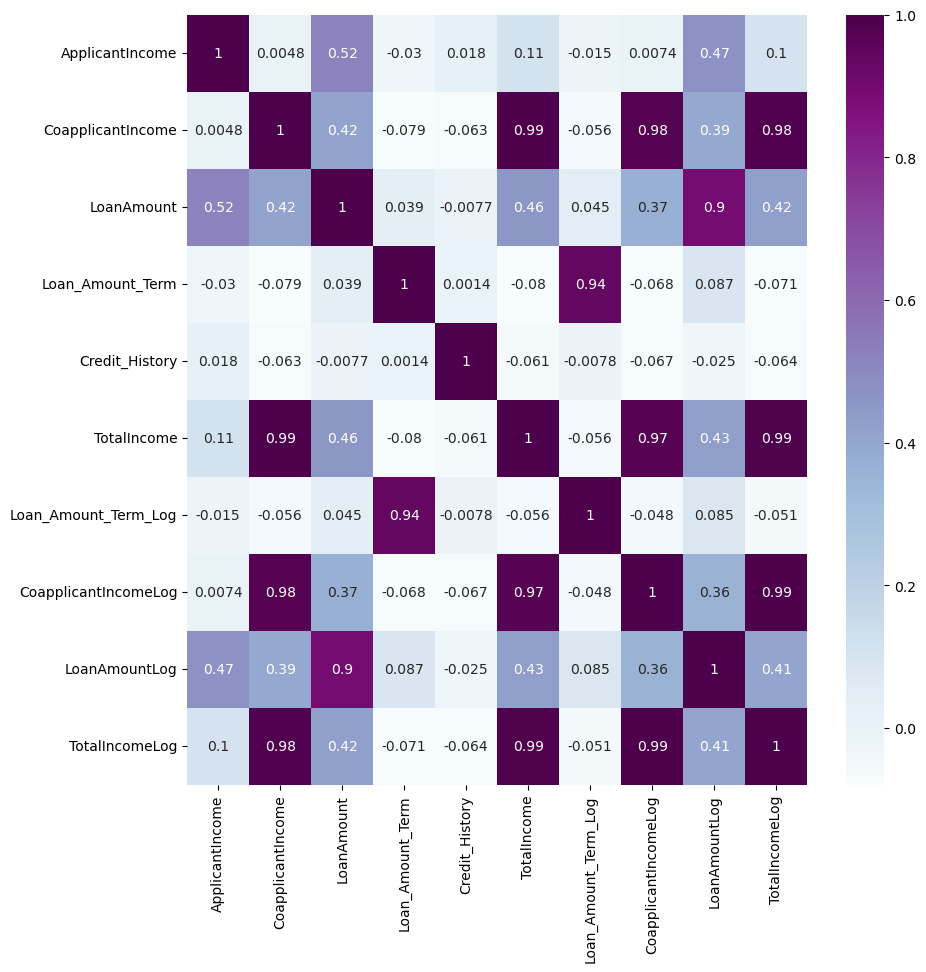

In [93]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [94]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Term_Log,CoapplicantIncomeLog,LoanAmountLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,2.160333,-inf,146.412162,360.0,1.0,Urban,Y,-inf,5.888878,NaN,4.986426,NaN
1,LP001003,Male,Yes,1,Graduate,No,2.131810,7.318540,128.000000,360.0,1.0,Rural,N,9.450349,5.888878,1.990411,4.852030,2.246052
2,LP001005,Male,Yes,0,Graduate,Yes,2.080237,-inf,66.000000,360.0,1.0,Urban,Y,-inf,5.888878,NaN,4.189655,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2.061368,7.765569,120.000000,360.0,1.0,Urban,Y,9.826937,5.888878,2.049700,4.787492,2.285127
4,LP001008,Male,No,0,Graduate,No,2.163267,-inf,141.000000,360.0,1.0,Urban,Y,-inf,5.888878,NaN,4.948760,NaN


In [120]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_Log,LoanAmountLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,5.888878,4.986426,NaN
1,1,1,1,0,0,1.0,0,0,5.888878,4.852030,2.246052
2,1,1,0,0,1,1.0,2,1,5.888878,4.189655,NaN
3,1,1,0,1,0,1.0,2,1,5.888878,4.787492,2.285127
4,1,0,0,0,0,1.0,2,1,5.888878,4.948760,NaN


In [121]:
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_Log,LoanAmountLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,5.888878,4.986426,NaN
1,1,1,1,0,0,1.0,0,0,5.888878,4.852030,2.246052
2,1,1,0,0,1,1.0,2,1,5.888878,4.189655,NaN
3,1,1,0,1,0,1.0,2,1,5.888878,4.787492,2.285127
4,1,0,0,0,0,1.0,2,1,5.888878,4.948760,NaN


***Train-Test Split***

In [122]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***Model Training***

In [124]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [126]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [127]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [128]:
model = ExtraTreesClassifier()
classify(model, X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

***Hyperparameter tuning***

In [129]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [130]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [131]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [132]:
sns.heatmap(cm, annot=True)

NameError: name 'cm' is not defined